# Multilayer perceptron in TensorFlow (using Keras)

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits using Keras.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
import sys
keras.__version__, tf.__version__, sys.version_info

('1.2.2',
 '1.0.0',
 sys.version_info(major=3, minor=4, micro=3, releaselevel='final', serial=0))

In [3]:
# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('../../lasagne/mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

(4000, 1, 28, 28) (4000,) 28


(4000, 784)

In [4]:
# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

In [5]:
lambd = 0.000005
from keras.regularizers import l2, activity_l2
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784),activity_regularizer=activity_l2(lambd)))
model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(50,activity_regularizer=activity_l2(lambd)))
model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax',activity_regularizer=activity_l2(lambd)))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [6]:
#tensorboard = keras.callbacks.TensorBoard(log_dir='/tmp/dumm/run4', write_graph=True)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          nb_epoch=10, 
          batch_size=128, 
          #callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)

# Attention, if you run this in a cocker container, setting verbose=1 sometimes kills the whole container 
# ERRO[0695] error getting events from daemon: EOF

Train on 2400 samples, validate on 600 samples
Epoch 1/10
0s - loss: 2.1114 - acc: 0.4108 - val_loss: 1.2449 - val_acc: 0.7833
Epoch 2/10
0s - loss: 1.2998 - acc: 0.7013 - val_loss: 0.9225 - val_acc: 0.8533
Epoch 3/10
0s - loss: 1.0249 - acc: 0.7933 - val_loss: 0.8000 - val_acc: 0.8850
Epoch 4/10
0s - loss: 0.8806 - acc: 0.8375 - val_loss: 0.7380 - val_acc: 0.8933
Epoch 5/10
0s - loss: 0.7966 - acc: 0.8654 - val_loss: 0.7001 - val_acc: 0.8950
Epoch 6/10
0s - loss: 0.7342 - acc: 0.8833 - val_loss: 0.6742 - val_acc: 0.8983
Epoch 7/10
0s - loss: 0.6983 - acc: 0.8996 - val_loss: 0.6506 - val_acc: 0.9050
Epoch 8/10
0s - loss: 0.6551 - acc: 0.9058 - val_loss: 0.6350 - val_acc: 0.9100
Epoch 9/10
0s - loss: 0.6193 - acc: 0.9200 - val_loss: 0.6194 - val_acc: 0.9200
Epoch 10/10
0s - loss: 0.5839 - acc: 0.9267 - val_loss: 0.6173 - val_acc: 0.9117


(0, 1.1)

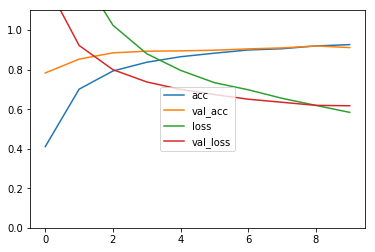

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['acc', 'val_acc', 'loss', 'val_loss'],loc=10)
plt.ylim((0,1.1))